In [1]:
%run ./Kermack_McKendrick_SIR_model.ipynb
%run ./graph_stats.ipynb

import itertools

# Load the aggregated adjacency matrices

In [2]:
contact_adj_mat_files = ['output/temporally_aggregate_matrices/contact/agg_mat_InVS13.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_InVS15.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_LH10.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_LyonSchool.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_SFHH.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_Thiers13.npy']

copresence_adj_mat_files = ['output/temporally_aggregate_matrices/co-presence/agg_mat_pres_InVS13.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_InVS15.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_LH10.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_LyonSchool.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_SFHH.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_Thiers13.npy']

agg_mat_InVS13 = np.load(contact_adj_mat_files[0])
agg_mat_InVS15 = np.load(contact_adj_mat_files[1])
agg_mat_LH10 = np.load(contact_adj_mat_files[2])
agg_mat_LyonSchool = np.load(contact_adj_mat_files[3])
agg_mat_SFHH = np.load(contact_adj_mat_files[4])
agg_mat_Thiers13 = np.load(contact_adj_mat_files[5])

agg_mat_pres_InVS13 = np.load(copresence_adj_mat_files[0])
agg_mat_pres_InVS15 = np.load(copresence_adj_mat_files[1])
agg_mat_pres_LH10 = np.load(copresence_adj_mat_files[2])
agg_mat_pres_LyonSchool = np.load(copresence_adj_mat_files[3])
agg_mat_pres_SFHH = np.load(copresence_adj_mat_files[4])
agg_mat_pres_Thiers13 = np.load(copresence_adj_mat_files[5])

# For each contact dataset, perform 100 simulations of the SIR epidemic, using:
### beta = 4 x 10^-4
### mu = 100 * beta/k, with k in [1, 2, 4, 6, 8, 10]
### dt = 1/(beta * median_degree(A))

In [3]:
beta = 4 * 10**-4
k_arr = [1, 2, 4, 6, 8, 10]


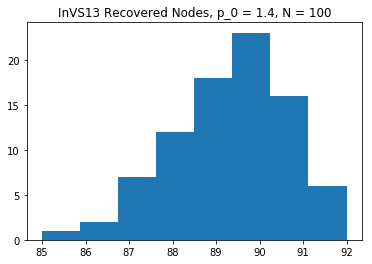

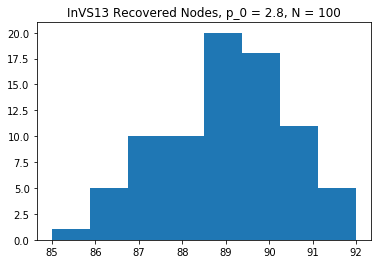

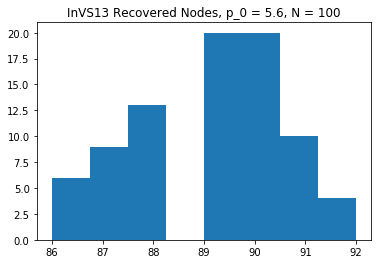

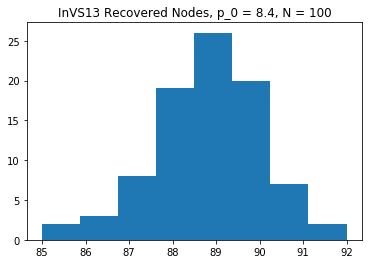

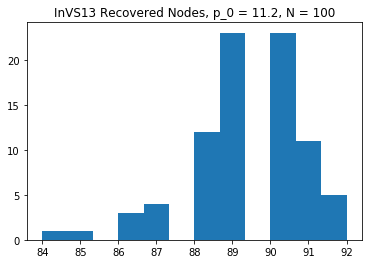

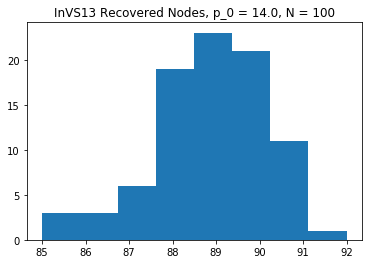

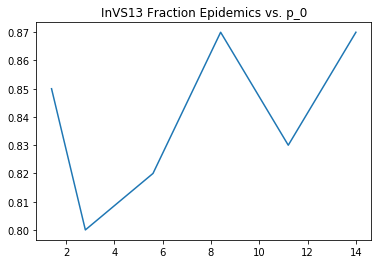

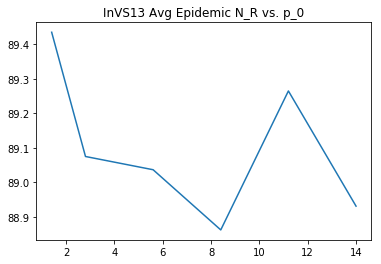

In [13]:
A = agg_mat_InVS13
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('InVS13 Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('InVS13 Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('InVS13 Avg Epidemic N_R vs. p_0')
plt.show()

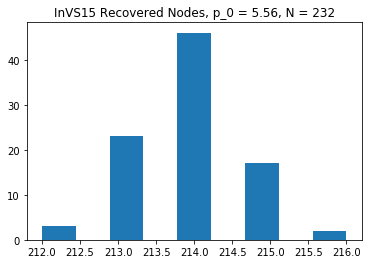

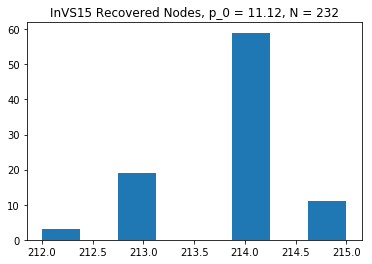

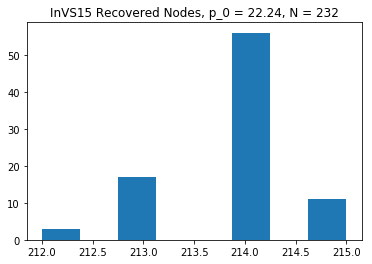

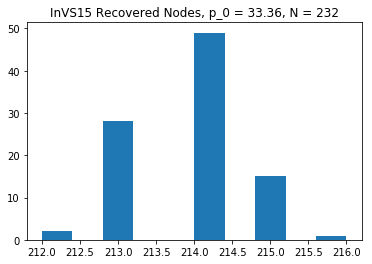

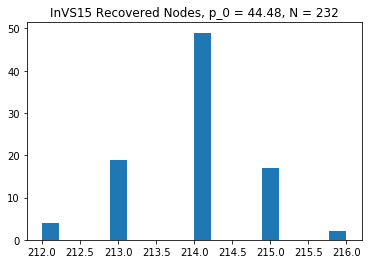

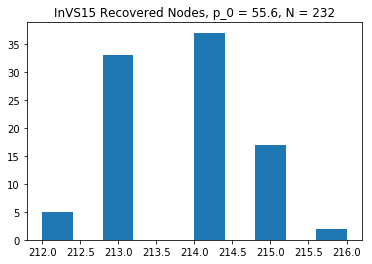

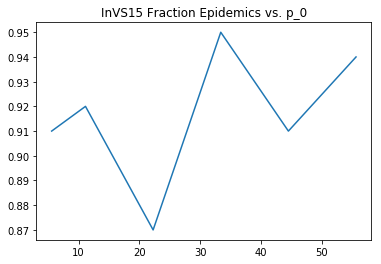

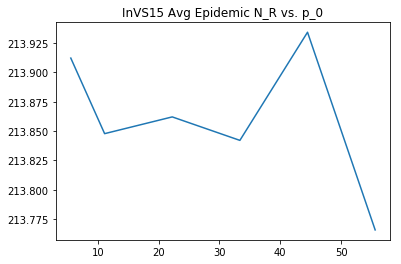

In [14]:
A = agg_mat_InVS15
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('InVS15 Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('InVS15 Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('InVS15 Avg Epidemic N_R vs. p_0')
plt.show()

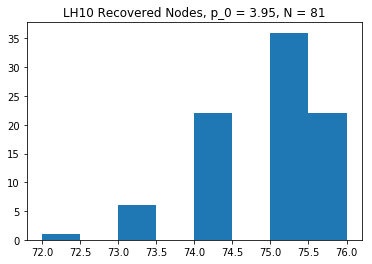

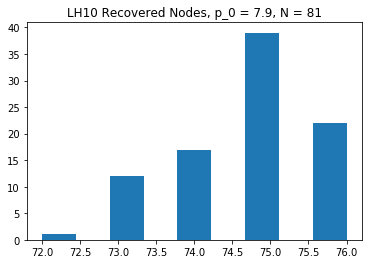

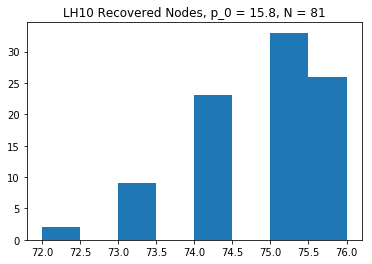

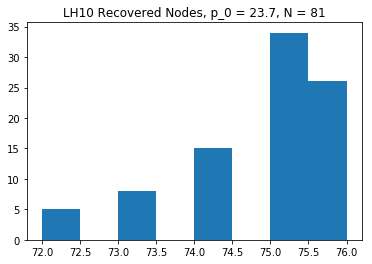

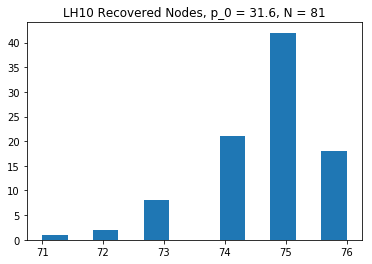

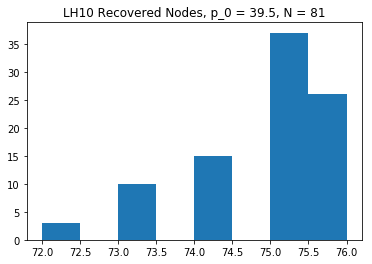

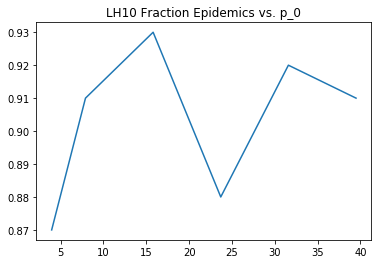

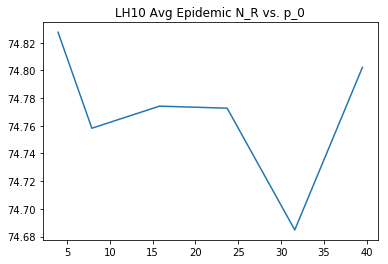

In [15]:
A = agg_mat_LH10
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('LH10 Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('LH10 Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('LH10 Avg Epidemic N_R vs. p_0')
plt.show()

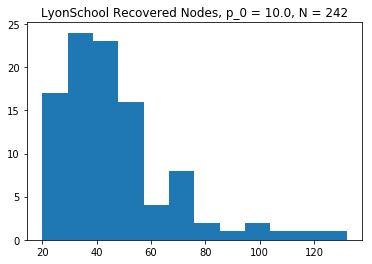

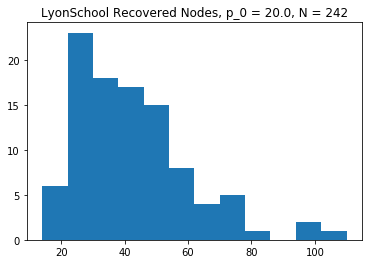

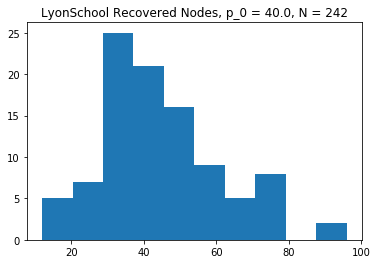

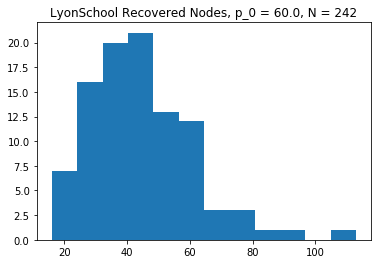

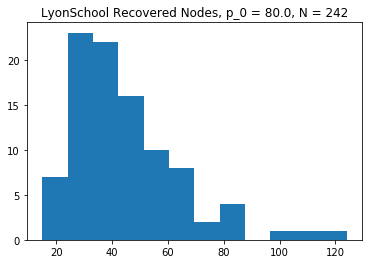

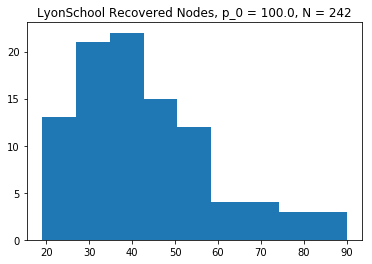

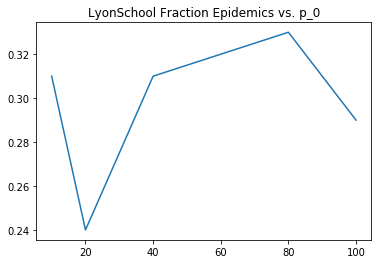

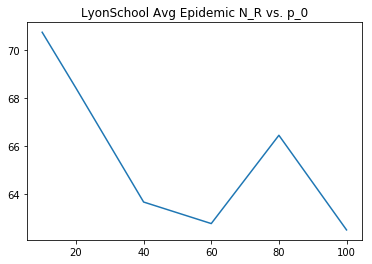

In [16]:
A = agg_mat_LyonSchool
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('LyonSchool Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('LyonSchool Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('LyonSchool Avg Epidemic N_R vs. p_0')
plt.show()

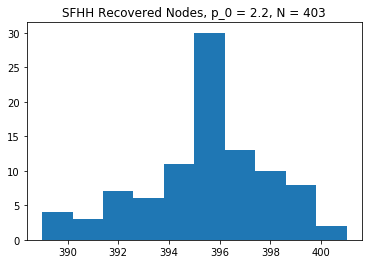

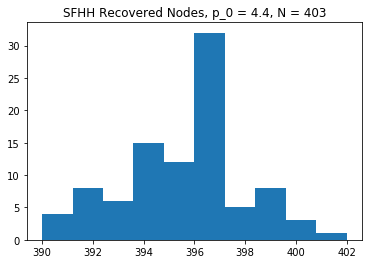

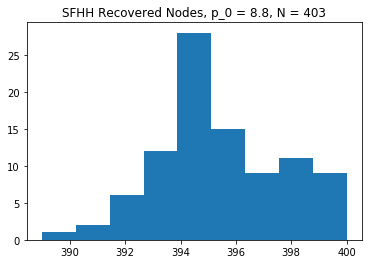

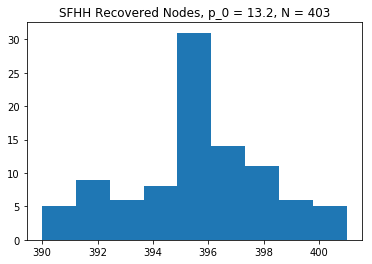

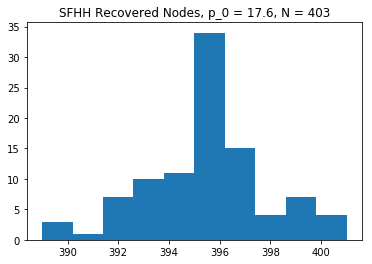

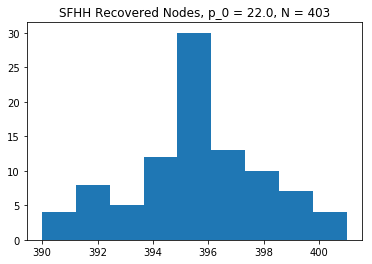

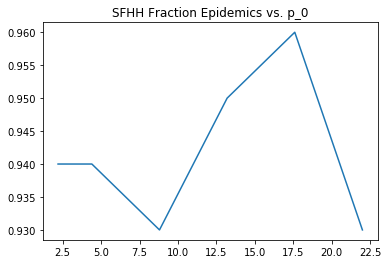

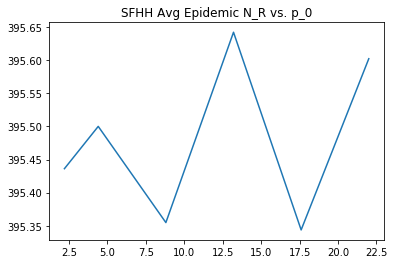

In [17]:
A = agg_mat_SFHH
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('SFHH Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('SFHH Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('SFHH Avg Epidemic N_R vs. p_0')
plt.show()

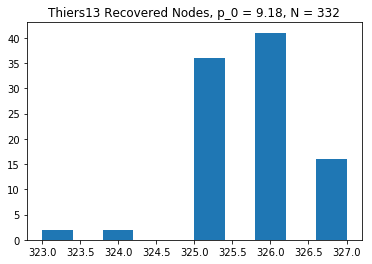

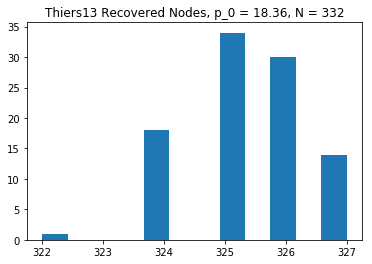

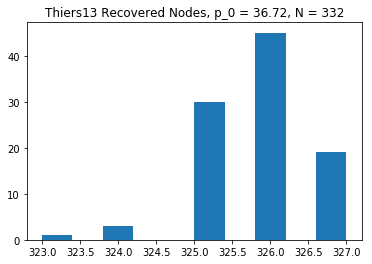

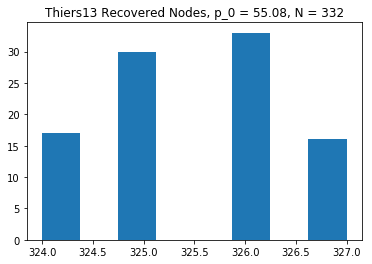

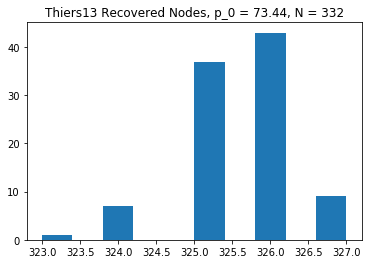

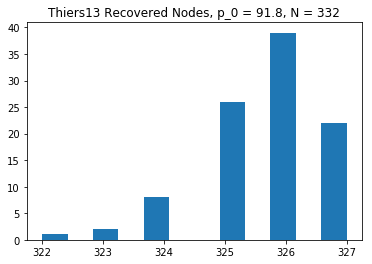

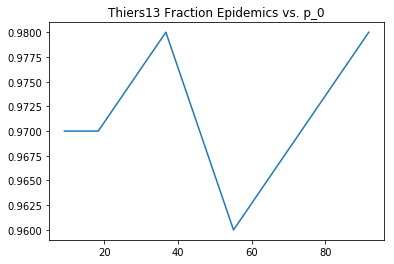

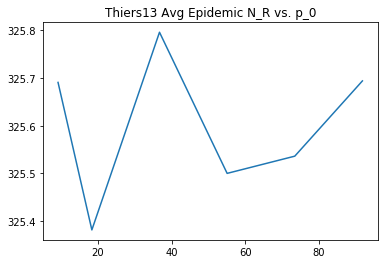

In [18]:
A = agg_mat_Thiers13
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
p_0_arr = []
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((len(k_arr), 100))

for k in k_arr:
    mu = 10**2 * beta / k
    p_0_arr.append(beta/mu * median_deg)

for k_idx in range(0, len(k_arr)):
    for sim_count in range(0, 100):
        SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
        n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
    frac_epidemics.append(float(num_epidemics) / 100)
    
    n_r_mod = np.array(n_r[k_idx])
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('Thiers13 Recovered Nodes, p_0 = {}, N = {}'.format(p_0_arr[k_idx], N))
    plt.show()
    
plt.plot(p_0_arr, frac_epidemics)
plt.title('Thiers13 Fraction Epidemics vs. p_0')
plt.show()

plt.plot(p_0_arr, avg_epidemic_n_r)
plt.title('Thiers13 Avg Epidemic N_R vs. p_0')
plt.show()


# Sampled Copresence SIR

Using an 80% fraction of edges sampled from the copresence graphs, we now run the SIR model on the subsampled graphs

In [ ]:
FS_sampled_copresence_files = ['output/sampled_copresence/FS_copresence_80pct_InVS13.npy',
                               'output/sampled_copresence/FS_copresence_80pct_InVS15.npy',
                               'output/sampled_copresence/FS_copresence_80pct_LH10.npy',
                               'output/sampled_copresence/FS_copresence_80pct_LyonSchool.npy',
                               'output/sampled_copresence/FS_copresence_80pct_SFHH.npy',
                               'output/sampled_copresence/FS_copresence_80pct_Thiers13.npy']

MHRW_sampled_copresence_files = ['output/sampled_copresence/MHRW_copresence_80pct_InVS13.npy',
                                 'output/sampled_copresence/MHRW_copresence_80pct_InVS15.npy',
                                 'output/sampled_copresence/MHRW_copresence_80pct_LH10.npy',
                                 'output/sampled_copresence/MHRW_copresence_80pct_LyonSchool.npy',
                                 'output/sampled_copresence/MHRW_copresence_80pct_SFHH.npy',
                                 'output/sampled_copresence/MHRW_copresence_80pct_Thiers13.npy']

SES_sampled_copresence_files = ['output/sampled_copresence/SES_copresence_80pct_InVS13.npy',
                                'output/sampled_copresence/SES_copresence_80pct_InVS15.npy',
                                'output/sampled_copresence/SES_copresence_80pct_LH10.npy',
                                'output/sampled_copresence/SES_copresence_80pct_LyonSchool.npy',
                                'output/sampled_copresence/SES_copresence_80pct_SFHH.npy',
                                'output/sampled_copresence/SES_copresence_80pct_Thiers13.npy']

UES_sampled_copresence_files = ['output/sampled_copresence/UES_copresence_80pct_InVS13.npy',
                                'output/sampled_copresence/UES_copresence_80pct_InVS15.npy',
                                'output/sampled_copresence/UES_copresence_80pct_LH10.npy',
                                'output/sampled_copresence/UES_copresence_80pct_LyonSchool.npy',
                                'output/sampled_copresence/UES_copresence_80pct_SFHH.npy',
                                'output/sampled_copresence/UES_copresence_80pct_Thiers13.npy']

UNS_sampled_copresence_files = ['output/sampled_copresence/UNS_copresence_80pct_InVS13.npy',
                                'output/sampled_copresence/UNS_copresence_80pct_InVS15.npy',
                                'output/sampled_copresence/UNS_copresence_80pct_LH10.npy',
                                'output/sampled_copresence/UNS_copresence_80pct_LyonSchool.npy',
                                'output/sampled_copresence/UNS_copresence_80pct_SFHH.npy',
                                'output/sampled_copresence/UNS_copresence_80pct_Thiers13.npy']

# FFS

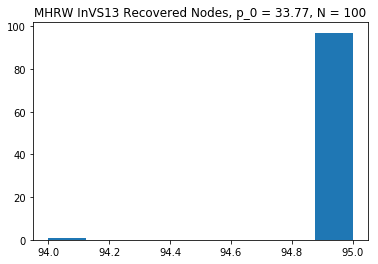

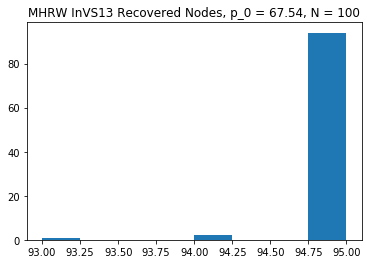

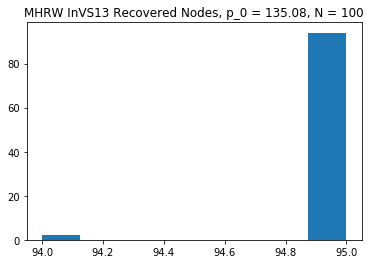

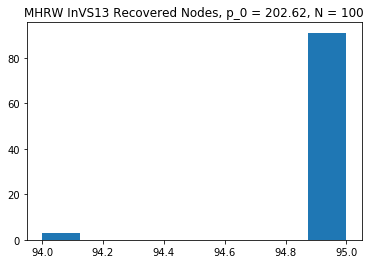

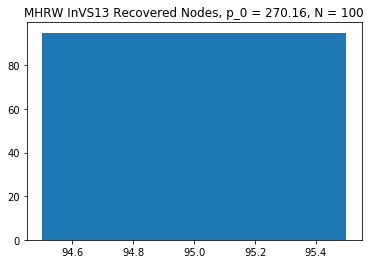

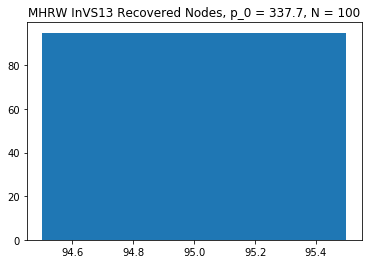

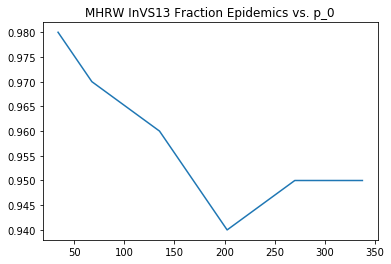

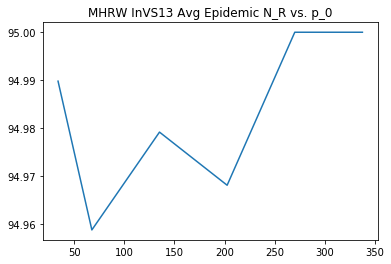

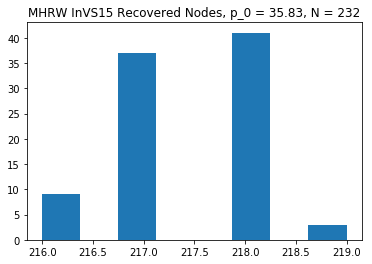

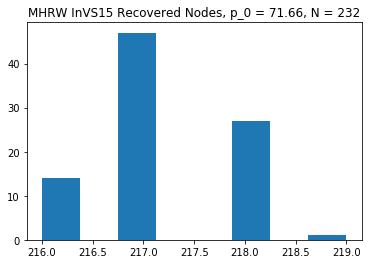

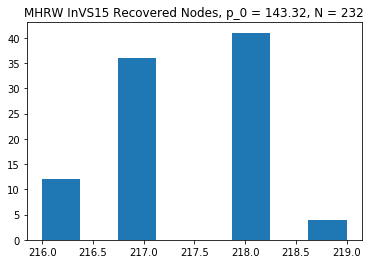

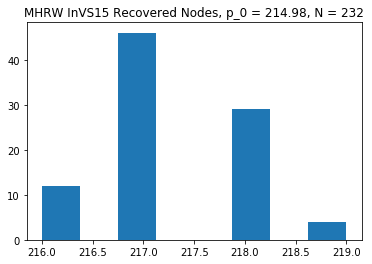

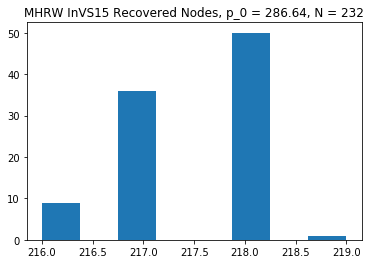

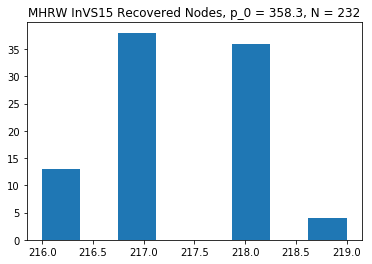

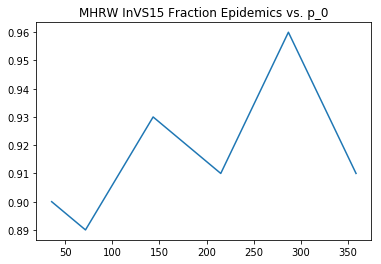

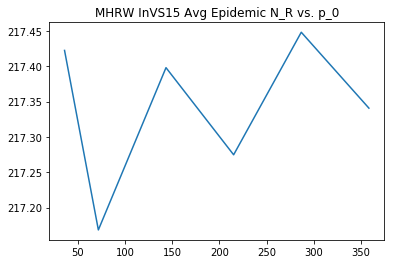

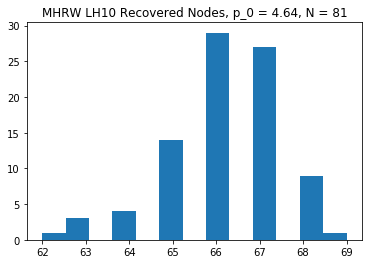

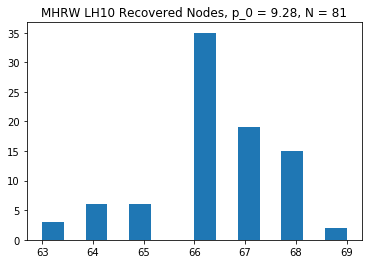

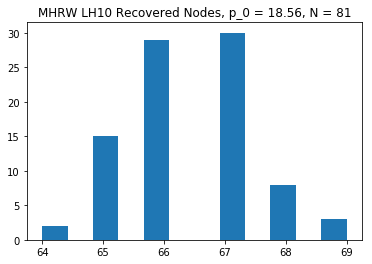

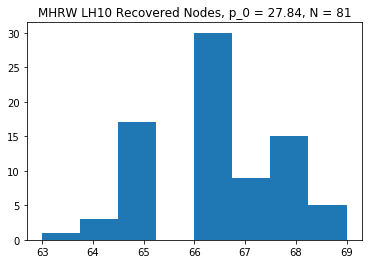

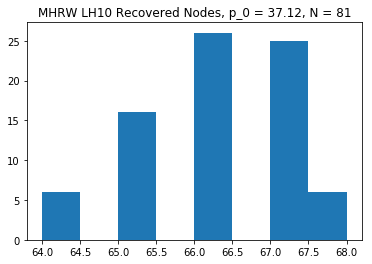

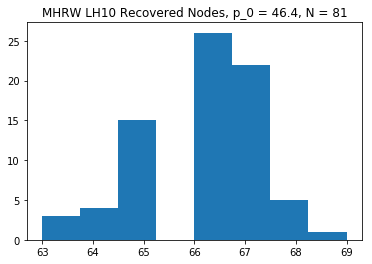

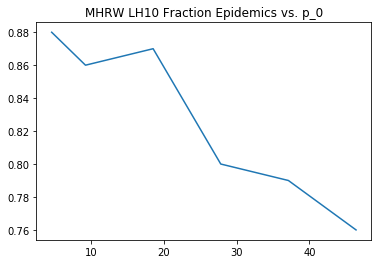

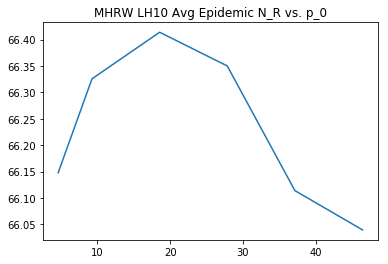

E:\Program Files\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\Program Files\Anaconda2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


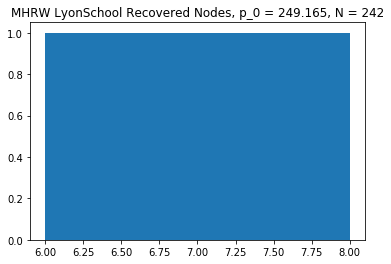

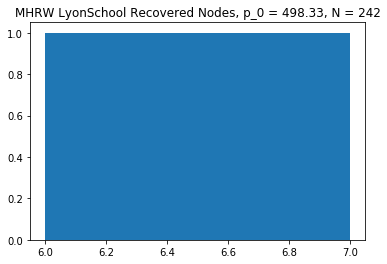

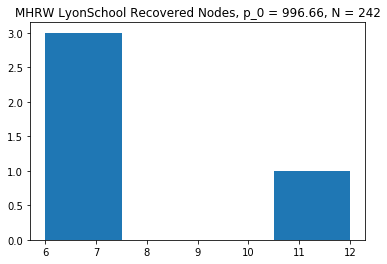

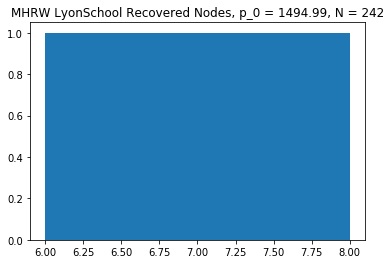

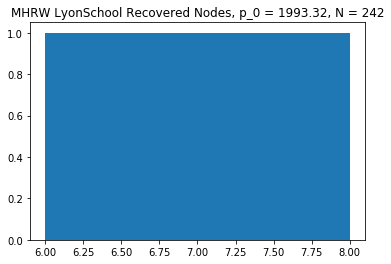

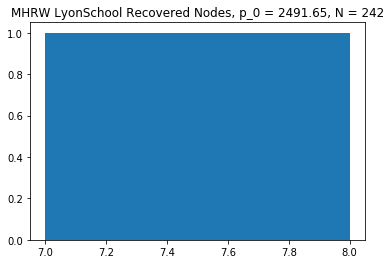

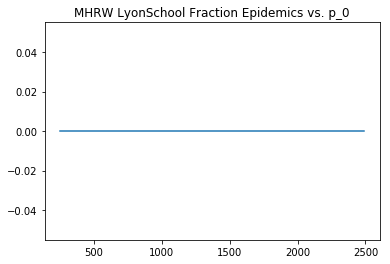

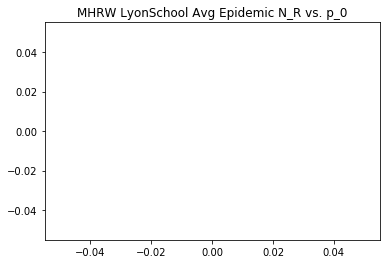

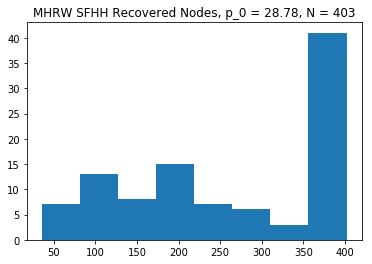

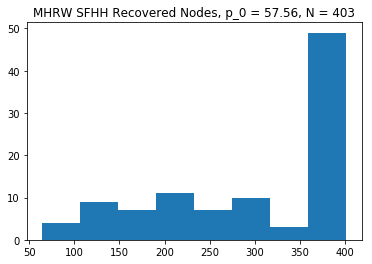

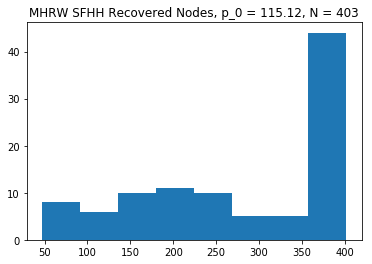

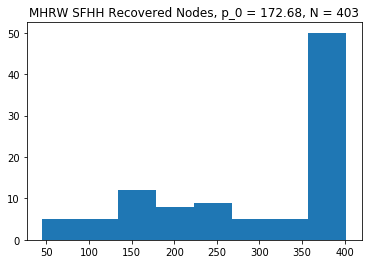

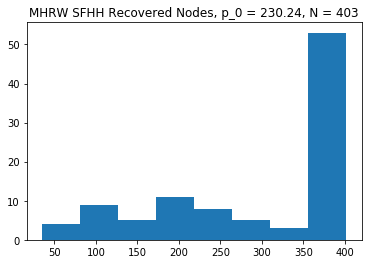

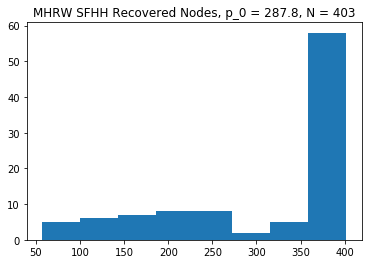

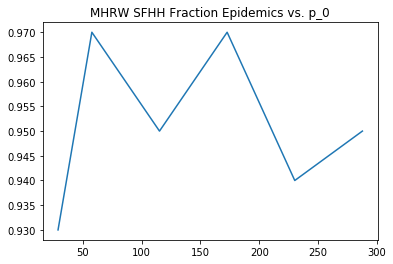

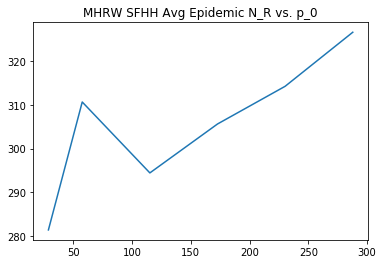

In [ ]:
plot_names = ['MHRW InVS13',
              'MHRW InVS15',
              'MHRW LH10',
              'MHRW LyonSchool',
              'MHRW SFHH',
              'MHRW Thiers13']

data_idx = 0
for fname in MHRW_sampled_copresence_files:
    A = np.load(fname)
    median_deg = compute_median_degree(A)
    N = get_num_vertices(A)
    epidemic_thresh = np.ceil(0.20 * N)
    dt = 1 / (beta * median_deg)
    p_0_arr = []
    frac_epidemics = []
    avg_epidemic_n_r = []

    n_r = np.zeros((len(k_arr), 100))

    for k in k_arr:
        mu = 10**2 * beta / k
        p_0_arr.append(beta/mu * median_deg)

    for k_idx in range(0, len(k_arr)):
        for sim_count in range(0, 100):
            SIR_results = Kermack_McKendrick_SIR_model(A, beta, mu, dt, False)
            n_r[k_idx][sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
        epidemic_n_r = [num for num in n_r[k_idx] if num > epidemic_thresh]
        avg_epidemic_n_r.append(np.mean(epidemic_n_r))
        num_epidemics = sum(n_r > epidemic_thresh for n_r in n_r[k_idx])
        frac_epidemics.append(float(num_epidemics) / 100)
    
        n_r_mod = np.array(n_r[k_idx])
        n_r_mod = n_r_mod[n_r_mod > 5]
        plt.hist(n_r_mod, bins='auto')
        plt.title('{} Recovered Nodes, p_0 = {}, N = {}'.format(plot_names[data_idx], p_0_arr[k_idx], N))
        plt.show()
    
    plt.plot(p_0_arr, frac_epidemics)
    plt.title('{} Fraction Epidemics vs. p_0'.format(plot_names[data_idx]))
    plt.show()

    plt.plot(p_0_arr, avg_epidemic_n_r)
    plt.title('{} Avg Epidemic N_R vs. p_0'.format(plot_names[data_idx]))
    plt.show()
    
    data_idx += 1

# Vaccination Experiments

In [ ]:
A = agg_mat_SFHH
median_deg = compute_median_degree(A)
N = get_num_vertices(A)
epidemic_thresh = np.ceil(0.20 * N)
dt = 1 / (beta * median_deg)
frac_epidemics = []
avg_epidemic_n_r = []

n_r = np.zeros((1, 100))

mu = 10**2 * beta
p_0 = beta/mu * median_deg

for sim_count in range(0, 10):
    # Random vaccinations
    SIR_results = random_vaccination_SIR_model(A, beta, mu, dt, 20, False) 
    n_r[sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh)
    frac_epidemics.append(float(num_epidemics) / 10)
    
    n_r_mod = np.array(n_r)
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('SFHH Recovered Nodes, p_0 = {}, N = {}'.format(p_0, N))
    plt.show()
    

for sim_count in range(0, 10):
    # Random vaccinations
    SIR_results = high_deg_vaccination_SIR_model(A, beta, mu, dt, 20, False) 
    n_r[sim_count] = sum( x == 'R' for x in SIR_results.values() )
        
    epidemic_n_r = [num for num in n_r if num > epidemic_thresh]
    avg_epidemic_n_r.append(np.mean(epidemic_n_r))
    num_epidemics = sum(n_r > epidemic_thresh)
    frac_epidemics.append(float(num_epidemics) / 10)
    
    n_r_mod = np.array(n_r)
    n_r_mod = n_r_mod[n_r_mod > 5]
    plt.hist(n_r_mod, bins='auto')
    plt.title('SFHH Recovered Nodes, p_0 = {}, N = {}'.format(p_0, N))
    plt.show()
